# Assignment 1: Introduction to the Fully Recurrent Network

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.


## Exercise 1: Numerical stability of the binary cross-entropy loss function

We will use the binary cross-entropy loss function to train our RNN, which is defined as 
$$
L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y),
$$
where $y$ is the label and $\hat y$ is a prediction, which comes from a model (e.g. an RNN) and is usually sigmoid-activated, i.e., we have
$$
\hat y = \sigma(z) = \frac{1}{1+e^{-z}}.
$$
The argument $z$ is called *logit*. For reasons of numerical stability it is better to let the model emit the logit $z$ (instead of the prediction $\hat y$) and incorporate the sigmoid activation into the loss function. Explain why this is the case and how we can gain numerical stability by combining the two functions $L_{\text{BCE}}(\hat y, y)$ and $\sigma(z)$ into one function $L(z, y) = L_{\text{BCE}}(\sigma(z), y)$. 

*Hint: Prove that $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ and argue why the right-hand side is numerically more stable. Finally, express $L(z,y)$ in terms of that form.*

########## YOUR SOLUTION HERE ##########

>Prove that $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$

Let's do it:
$$
\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)
$$
remember, that $e^{|-z|} = \frac{1}{e^{z}}$ and $\log(\frac{a}{b}) = \log(a)-\log(b)$ , so  
$$
\log (1+e^{-|z|}) = \log (1+ \frac{1}{e^{z}}) = \log (\frac{e^{z}+1}{e^{z}})= \log(e^{z}+1) - \log(e^{z}) =\log(e^{z}+1) - {z} 
$$

Substituting $\log (1+e^{-|z|})$ in the original expression through the calculation above results in the following:
$$
\log(1+e^{z}) = \log(e^{z}+1) - {z} + \max(0,z)
$$
assuming that $\max(0,z)$ results in most cases in $z$, so $- {z} + \max(0,z)$ are excluding each other, what results in:
$$
\log(1+e^{z}) = \log(e^{z}+1)
$$

>argue why the right-hand side is numerically more stable

Right-hand side is numerically more stable due to its linearity element expressed through $\max(0, z)$.

>Finally, express $L(z,y)$ in terms of that form.

Now let's completely express BCE loss function in terms of $\hat y = \sigma(z) = \frac{1}{1+e^{-z}}$:
$$
L_{\text{BCE}}(z, y) = -y \log( \frac{1}{1+e^{-z}}) - (1-y) \log (1-\frac{1}{1+e^{-z}}) = 
$$

$$
=-y(\log(1)-\log(1+e^{-z}))-(1-y)\log(\frac{1+e^{-z}-1}{1+e^{-z}})=
$$

$$
= -y(0-\log(1+e^{-z}))-(1-y)\log(\frac{e^{-z}}{1+e^{-z}}) =
$$

$$
= -y(-\log(1+e^{-z}))-(1-y)(\log(e^{-z}) - \log(1+e^{-z}))= 
$$

$$
= -y(-\log(1+e^{-z}))-(1-y)(-z - \log(1+e^{-z}))
$$
let's express $\log(1+e^{-z})$ so that $-z$ will become positive:
$$
-y(-\log(1+e^{z})+z)-(1-y)(-z - \log(1+e^{z})+z)=  
$$
$$
=-y(-\log(1+e^{z})+z)-(1-y)(- \log(1+e^{z}))
$$
Now we can susbtitute $\log(1+e^{z})$ through the expression above given in the hint:
$$
=-y(-\log (1+e^{-|z|}))-(1-y)(- \log (1+e^{-|z|}) - \max(0, z))=
$$
$$
=-y(-\log(1+e^{-|z|}))+(1-y)(\log(1+e^{-|z|})+\max(0, z))=
$$
$$
=y\log(1+e^{-|z|})+\log(1+e^{-|z|})-y\log(1+e^{-|z|})+\max(0, z)-y\max(0, z)=
$$
$$
=\log(1+e^{-|z|})+\max(0, z)(1-y) = 
  \begin{cases}
   \log(1+e^{-|z|}) + z(1-y), & \text{z > 0} \\
   \log(1+e^{-|z|}), & \text{z < 0}
  \end{cases}

$$


## Exercise 2: Derivative of the loss

Calculate the derivative of the binary cross-entropy loss function $L(z, y)$ with respect to the logit $z$.

########## YOUR SOLUTION HERE ##########


$$
\frac{\partial L_{\text{BCE}}(z, y)}{\partial z}=\frac{\log(1+e^{-|z|})+\max(0, z)(1-y)}{\partial z} 
$$
Let's firstly find derivative of $\log(1+e^{-|z|})$:
$$
\frac{\partial\log(1+e^{-|z|})}{\partial z} = \frac{\partial \log(1+e^{z})}{\partial z} - \frac{\partial \log(e^z)}{\partial z} =\frac{e^z}{1+e^z} -1
$$

Since we have conditons due to $\max$ function, our derivative will be also conditioned:

$$
\frac{\partial L_{\text{BCE}}(z, y)}{\partial z}=
\begin{cases}
   \frac{e^z}{1+e^z} -y, & \text{z > 0} \\ \\
   \frac{e^z}{1+e^z} -1, & \text{z < 0}
  \end{cases}
$$



## Exercise 3: Initializing the network
Consider the fully recurrent network
$$
s(t) = W x(t) + R a(t-1) \\
a(t) = \tanh(s(t)) \\
z(t) = V a(t) \\
\hat y(t) = \sigma(z(t))
$$
for $t \in \mathbb{N}, x(t) \in \mathbb{R}^{D}, s(t) \in \mathbb{R}^{I}, a(t) \in \mathbb{R}^{I}, z(t) \in \mathbb{R}^K, \hat y(t) \in \mathbb{R}^K$ and $W, R, V$ are real matrices of appropriate sizes and $\hat a(0) = 0$. 

*Compared to the lecture notes we choose $f(x) = \tanh(x) = (e^x - e^{-x})(e^x + e^{-x})^{-1}$ and $\varphi(x) = \sigma(x) = (1+e^{-x})^{-1}$. Further, we introduced an auxiliary variable $z(t)$ and transposed the weight matrices.*

Write a function `init` that takes a `model` and integers $D, I, K$ as arguments and stores the matrices $W, R, V$ as members `model.W`, `model.R`, `model.V`, respectively. The matrices should be `numpy` arrays of appropriate sizes and filled with random values that are uniformly distributed between -0.01 and 0.01. 

>The matrices should be `numpy` arrays of appropriate sizes and filled with random values that are uniformly distributed between -0.01 and 0.01. 

From the lecture notes (page 27) the dimensions of matrices should be set as following: $W \in \mathbb{R}^{D \times I}$, $R \in \mathbb{R}^{I \times I}$, $V \in \mathbb{R}^{I \times K}$

In [29]:
%matplotlib inline
import numpy as np
from scipy.special import expit as sigmoid

class Obj(object):
    pass

model = Obj()
T, D, I, K = 10, 3, 5, 1

def init(model, D, I, K):
    ########## YOUR SOLUTION HERE ##########
    model.W = np.random.uniform(low=-0.01, high=0.01,size=(D,I))#input weight matrix: maps input features to hidden representations
    model.R = np.random.uniform(low=-0.01, high=0.01,size=(I,I))#recurrent weight matrix: holds the weights of the loop connections, maps hidden representations forward in time.
    model.V = np.random.uniform(low=-0.01, high=0.01,size=(I,K))#output weight matrix which maps the network’s hidden representations to the output/target space.

Obj.init = init
model.init(D, I, K)

let'see whether it works as desired:

In [30]:
print(f"W: {model.W}\n W's shape: {model.W.shape}\n\nR: {model.R}\n R's shape: {model.R.shape}\n\nV: {model.V}\n V's shape: {model.V.shape}")

W: [[ 0.00270145  0.00070601 -0.00013114 -0.004882   -0.00342428]
 [ 0.00380981  0.00391476  0.00886534 -0.00724422  0.00846275]
 [ 0.00806589  0.00274189 -0.00773364 -0.00012657 -0.00201547]]
 W's shape: (3, 5)

R: [[-2.94798698e-03  8.38397524e-05  2.84710492e-03 -4.11521447e-03
   8.45899034e-03]
 [ 2.41106944e-04 -9.08529843e-04  2.28708841e-03  8.65613246e-03
   6.86119740e-03]
 [ 3.41228284e-03  9.41743563e-03 -4.60431884e-03 -6.25537617e-03
   4.71607135e-03]
 [-1.17158981e-03 -8.72331647e-03 -9.38800669e-03  3.40014103e-04
   9.31512314e-04]
 [ 5.27279364e-03  6.60040469e-03 -6.89618564e-03 -8.12120966e-03
  -2.94045759e-03]]
 R's shape: (5, 5)

V: [[ 0.00546583]
 [ 0.00635806]
 [ 0.00419458]
 [-0.0013812 ]
 [-0.00356332]]
 V's shape: (5, 1)


## Exercise 4: The forward pass
Implement the forward pass for the fully recurrent network for sequence classification (many-to-one mapping). To this end, write a function `forward` that takes a `model`, a sequence of input vectors `x`, and a label `y` as arguments. The inputs will be represented as a `numpy` array of shape `(T, D)`. It should execute the behavior of the fully recurrent network and evaluate the (numerically stabilized) binary cross-entropy loss at the end of the sequence and return the resulting loss value. Store the sequence of hidden activations $(a(t))_{t=1}^T$ and the logit $z(T)$ into `model.a` and `model.z`, respectively. 

In [31]:

def forward(model, x, y):
    model.x = x
    model.y = y
    model.a = np.zeros((T,I)) # a ∈ ℝ^(10x5)
    model.z = np.zeros(T) # z ∈ ℝ^(10,)
    loss = np.empty(T) # z ∈ ℝ^(10,)
    """
    Often, a(0) = 0 is a reasonable choice as this corresponds to a “clean” memory.    
    """
    for t in range (T): # i.e. in range(10)
        
        if t==0:
            #use the current recurrent element, since it's zero
            a_t = model.a[t].reshape(model.a.shape[1],1) # a_t ∈ ℝ^(5x1)
        else:
            #now use the previous recurrent element 
            a_t = model.a[t-1].reshape(model.a.shape[1],1) # a_t ∈ ℝ^(5x1)    

        w_T = np.transpose(model.W) # w_T ∈ ℝ^(5x3)
        x_t = model.x[t].reshape(model.x.shape[1],1) # x_t ∈ ℝ^(3x1)

        #     (5,3)x(3,1)=(5,1)
        s_t = np.dot(w_T,x_t) + \
              np.dot(model.R,a_t)
        #     (5,5)x(5,1)=(5,1)  
        # ==> s_t ∈ ℝ^(5x1)

        a_t = np.tanh(s_t) # same dims as with s_t
        v_T = np.transpose(model.V) # v_T ∈ ℝ^(1x5)
        model.z[t] = np.dot(v_T,a_t) # model.z[t] ∈ ℝ^(1x1)
        if model.z[t]>0:
            loss[t] = np.log(1+np.exp(-np.absolute(model.z[t])))+max(0,model.z[t].item())*(1-y)
        else:
            loss[t] = np.log(1+np.exp(-np.absolute(model.z[t])))
            
        model.a[t] = a_t.reshape(1,I) # add the recurrent node
    return loss[-1]

Obj.forward = forward
model.forward(np.random.uniform(-1, 1, (T, D)), 1)

0.6931453085112314

## Exercise 5: The computational graph

Visualize the computational graph of the fully recurrent network unfolded in time. The graph should show the functional dependencies of the nodes $x(t), a(t), z(t), L(z(t), y(t))$ for $t \in \{1, 2, 3\}$. Use the package `networkx` in combination with `matplotlib` to draw a directed graph with labelled nodes and edges. If you need help take a look at [this guide](https://networkx.guide/visualization/basics/). Make sure to arrange the nodes in a meaningful way. 

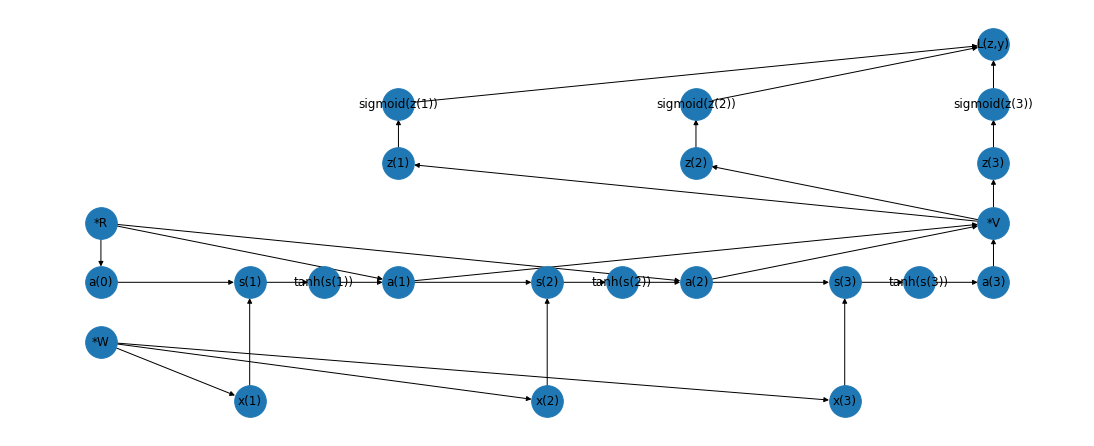

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

########## YOUR SOLUTION HERE ##########
G = nx.DiGraph()
G.add_node
pos={
    '*R': [0,1],
    '*W': [0,-1],
    '*V':[12,1],
    'L(z,y)':[12,4],

    'a(0)':[0,0],
    's(1)':[2,0],

    'x(1)': [2,-2],
    'tanh(s(1))': [3,0],
    'a(1)':[4,0],
    
    'z(1)':[4,2],
    'sigmoid(z(1))':[4,3],
    
    
    
    's(2)':[6,0],
    'x(2)': [6,-2],
    'tanh(s(2))': [7,0],
    'a(2)':[8,0],
    
    'z(2)':[8,2],
    'sigmoid(z(2))':[8,3],

    
    's(3)':[10,0],
    'x(3)': [10,-2],
    'tanh(s(3))': [11,0],
    'a(3)':[12,0],

    'z(3)':[12,2],
    'sigmoid(z(3))':[12,3],
    
    }

G.add_edges_from([
    ('*R','a(0)',),('a(0)','s(1)'),('s(1)','tanh(s(1))'),('tanh(s(1))','a(1)'),
    ('*R','a(1)'),('a(1)','s(2)'),('s(2)','tanh(s(2))'),('tanh(s(2))','a(2)'),
    ('*R','a(2)'),('a(2)','s(3)'),('s(3)','tanh(s(3))'),('tanh(s(3))','a(3)'),

    ('*W','x(1)'),('x(1)','s(1)'),
    ('*W','x(2)'),('x(2)','s(2)'),
    ('*W','x(3)'),('x(3)','s(3)'),

    ('a(1)','*V'),('*V','z(1)'),('z(1)','sigmoid(z(1))'),
    ('a(2)','*V'),('*V','z(2)'),('z(2)','sigmoid(z(2))'),
    ('a(3)','*V'),('*V','z(3)'),('z(3)','sigmoid(z(3))'),
    ('sigmoid(z(1))','L(z,y)'),
    ('sigmoid(z(2))','L(z,y)'),
    ('sigmoid(z(3))','L(z,y)')
])

plt.figure(figsize=(15,6))
nx.draw(G,pos,with_labels=True, node_size=1000)
    

plt.show()